<center><h1>Analyzing the Top 1000 IMDb Rated Movies</h1>
 <h2>by Raunav Sharma & Mohamed Alderei</h2> </center>

### Libraries used in the notebook

In [ ]:
import os
import time
import random
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from collections import Counter

<center> <h1> Introduction </h1> </center>

**Purpose**

This project aims to explore the various relationships within the realms of cinematic excellence, in particular, the top 1000 IMDb rated movies. Our goal is to draw insights from the ever changing landscape of the movie industry.
Focusing on the top 1000 movies gives us a chance to unravel the nuanced interplay between critical acclaim, audience engagement, and commercial success.

**Scope & Focus**

The IMDb platform serves as a lens through which one can examine the multifaceted dimensions of film success. This research seeks to answer fundamental questions about the factors influencing audience preferences, the symbiotic relationship between critical acclaim and financial performance, and the underlying dynamics that contribute to a movie's ascent to the pinnacle of user ratings.

**Methodology**

Employing a combination of web crawling and parsing techniques, the project systematically navigates through IMDb's top-rated movies, collecting data that spans critical metrics such as ratings, number of votes, and gross earnings. The development of a web crawler ensures the efficient acquisition of a significant volume of data, while a tailored parser extracts pertinent information from the HTML structure of IMDb pages, facilitating a comprehensive and in-depth analysis.

**End Goal**

The end goal of this project is to examine the various factors that influence the success of top-rated movies, providing valuable insights for industry professionals, enthusiasts, and researchers alike.

<center><h1>Data Collection and Extraction</h1></center>

**Data Source**

The data is sourced from the IMDb website, specifically the list of top 1000 rated movies available at the URL: https://www.imdb.com/search/title/?groups=top_1000&view=simple&sort=user_rating,desc. This webpage provides a curated collection of movies ranked based on user ratings, allowing us to explore patterns and correlations within this elite selection.

**Web Crawler**

A web crawler was developed to systematically navigate through the IMDb website. The crawler utilized the *urllib* library for making HTTP requests and the *BeautifulSoup* library for HTML parsing. The strategy involved simulating human behavior by introducing random sleep intervals between requests to avoid triggering anti-scraping mechanisms.


**Structured Format of URL**

The IMDb website structure is conducive to automation. The URL format for accessing the top 1000 movies is self-explanatory, allowing for efficient data collection. For instance, to access the list of top-rated movies for a particular year, the URL format is: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=simple&start=1&count=100&release_date='year','year', where 'year' is replaced with the desired year.


**Parser**

The parser function was designed to extract relevant movie information from the downloaded HTML pages. The HTML structure of the IMDb pages was analyzed to identify key elements such as **movie ratings**, **number of votes**, **gross earnings**, and **movie genres**. The BeautifulSoup library facilitated the extraction of data, ensuring a systematic approach to gathering pertinent information.

**API's**

No external APIs or third-party libraries were used for the parsing step, as the necessary data was readily available in the HTML structure of the IMDb pages.
The parser function iterated through each movie container, extracting the required information and storing it in lists for subsequent analysis.

The provided code scrapes and stores data from IMDb, including movie ratings, number of votes, gross earnings, and genres:

In [ ]:
###################################
def download_html(url):
    try:
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(req).read()
        return html
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
###################################

##########################################
# Function to scrape movie data
def scrape_movies(html_content, ratings, votes, grosses, genres):
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract movie data
    movie_containers = soup.find_all('div', class_='lister-item mode-advanced')
    for container in movie_containers:
        if container.find('div', class_='ratings-bar'):
            # Extract ratings
            rating = float(container.strong.text)
            ratings.append(rating)

            # Extract number of votes
            vote = container.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))

            # Extract gross earnings if available
            gross_span = container.find_all('span', attrs={'name':'nv'})
            if len(gross_span) > 1 and 'data-value' in gross_span[1].attrs:
                grosses.append(int(gross_span[1]['data-value'].replace(',', '')))
            else:
                grosses.append(None)  # Append None if gross is not available

            # Extract genres
            genre_tags = container.find('span', class_='genre')
            if genre_tags:
                genre_list = [g.strip() for g in genre_tags.text.split(',')]
                genres.extend(genre_list)

# Lists to store scraped data
ratings = []
votes = []
grosses = []
genres = []

# Loop through pages to download IMDb's top 1000 movies
start = 1
for y in range(1, 11):
    tmp = random.random() * 5.0
    print('Sleep for', tmp, 'seconds')
    time.sleep(tmp)

    url = f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start={start}&count=100"
    print('Download from:', url)

    # Download and scrape the HTML page
    html = download_html(url)
    if html:
        scrape_movies(html, ratings, votes, grosses, genres)
    else:
        print(f"Failed to retrieve data from {url}")

    start += 100

clean_votes = [vote for vote, gross in zip(votes, grosses) if gross is not None]
clean_ratings = [rating for rating, gross in zip(ratings, grosses) if gross is not None]
clean_grosses = [gross for gross in grosses if gross is not None]

Sleep for 4.795531669634652 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=1&count=100
Sleep for 1.1964743097846102 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=101&count=100
Sleep for 3.7560492079743852 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=201&count=100
Sleep for 0.7855396848020513 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=301&count=100
Sleep for 3.184671480097582 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=401&count=100
Sleep for 3.562393874091885 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=501&count=100
Sleep for 2.7384834823779336 seconds
Download from: https://www.imdb.com/search/t

<center><h1>Data analysis</h1>

<center><h2>Scatter plot of number of votes vs movie ratings and gross earnings vs movie ratings</h2> </center>

<p>
In our data analysis approach, we chose to construct scatter plots to investigate potential correlations between the number of votes and movie ratings. Additionally, we explored the relationship between gross earnings and movie ratings. These visual representations were selected to effectively identify and understand any existing patterns or trends between these variables.
</p>

In [ ]:
def create_scatter_plot(x, y, title, x_label, y_label, filename):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)

    log_x = np.log(x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, y)

    best_fit_x = np.linspace(min(x), max(x), 1000)
    best_fit_y = slope * np.log(best_fit_x) + intercept

    plt.plot(best_fit_x, best_fit_y, color='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.yscale('linear')
    plt.xscale('log')
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

<p>
We then visualize the data. We perform a linear fit, and visualize the best line that fits all data points.
</p>

In [ ]:
create_scatter_plot(clean_votes, clean_ratings, 'Number of Votes vs. Movie Ratings', 'Number of Votes', 'Movie Ratings', 'votes_vs_ratings.png')

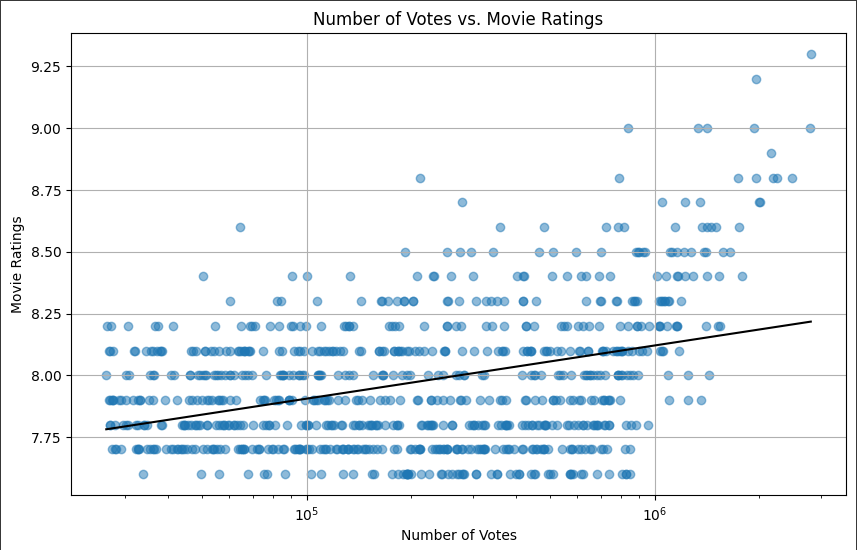

**Movie Ratings vs Number of votes**

There is a positive relationship between movie ratings and the number of votes they receive. This trend can be partly explained by the behavior of viewers: those who truly enjoy a movie often take the extra effort to leave a high rating. Conversely, viewers who dislike a movie are also motivated to rate it, typically giving it a low score. However, these are the top 1000 rated movies, so the movies on the lower end of the data are neutral and movies that have a neutral response tend not to compel viewers to vote at all.


In [ ]:
create_scatter_plot(clean_grosses, clean_ratings, 'Gross Earnings vs. Movie Ratings', 'Gross Earnings ($)', 'Movie Ratings', 'gross_vs_ratings.png')

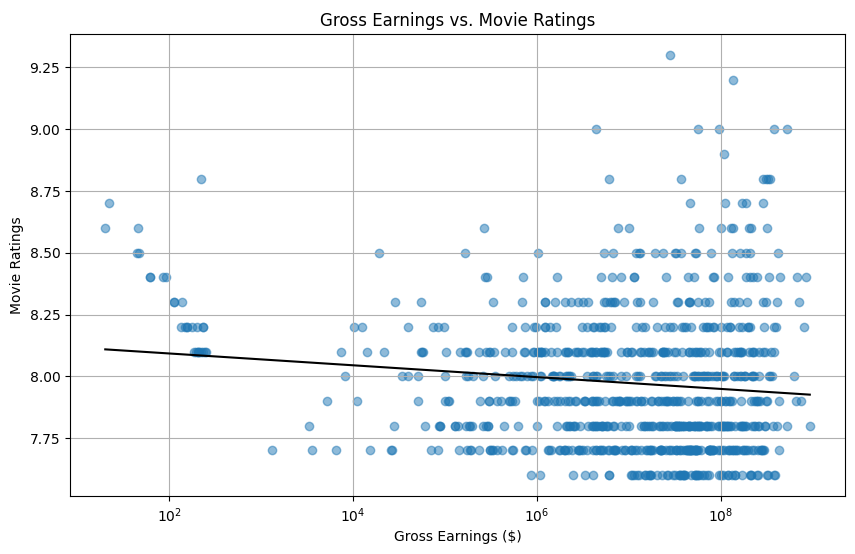

**Movie Ratings vs Gross Earnings**

There's a trend showing that as movie earnings increase, ratings tend to decrease. This might be due to differences in movie genres. For instance, sci-fi movies are expensive to produce and make a lot of money but may not always get high ratings, whereas dramas, which are cheaper to make, often receive better reviews.

<center><h2>Distribution of Genres of Top 1000 Movies</h2> </center>

<p>
Our objective was to conduct an examination of the genre distribution in order to gain insights into the tendencies of different genres achieving higher rankings. By doing so, we hoped to uncover whether certain genres inherently possess qualities that predispose them to more favorable positions in rankings, possibly due to their popularity, audience appeal, or unique attributes. This analysis could reveal significant patterns in how genres impact ranking outcomes.</p>

We create the calculations so we can plot them in a bar graph

In [ ]:
genre_counts = Counter(genres)

# Calculating the total number of genre entries
total_genres = sum(genre_counts.values())

# Calculating probabilities for each genre
genre_probabilities = {genre: count / total_genres for genre, count in genre_counts.items()}

# Sorting genres for a consistent plot
sorted_genres = sorted(genre_probabilities.keys())
probabilities = [genre_probabilities[genre] for genre in sorted_genres]


plt.bar(sorted_genres, probabilities, color='blue', alpha=0.5)
plt.xlabel('Genre')
plt.ylabel('Probability')
plt.title('Empirical Probability Distribution of Movie Genres')
plt.xticks(rotation=90)  # Rotates the genre names for better readability
plt.figure(figsize=(10, 6))

plt.show()

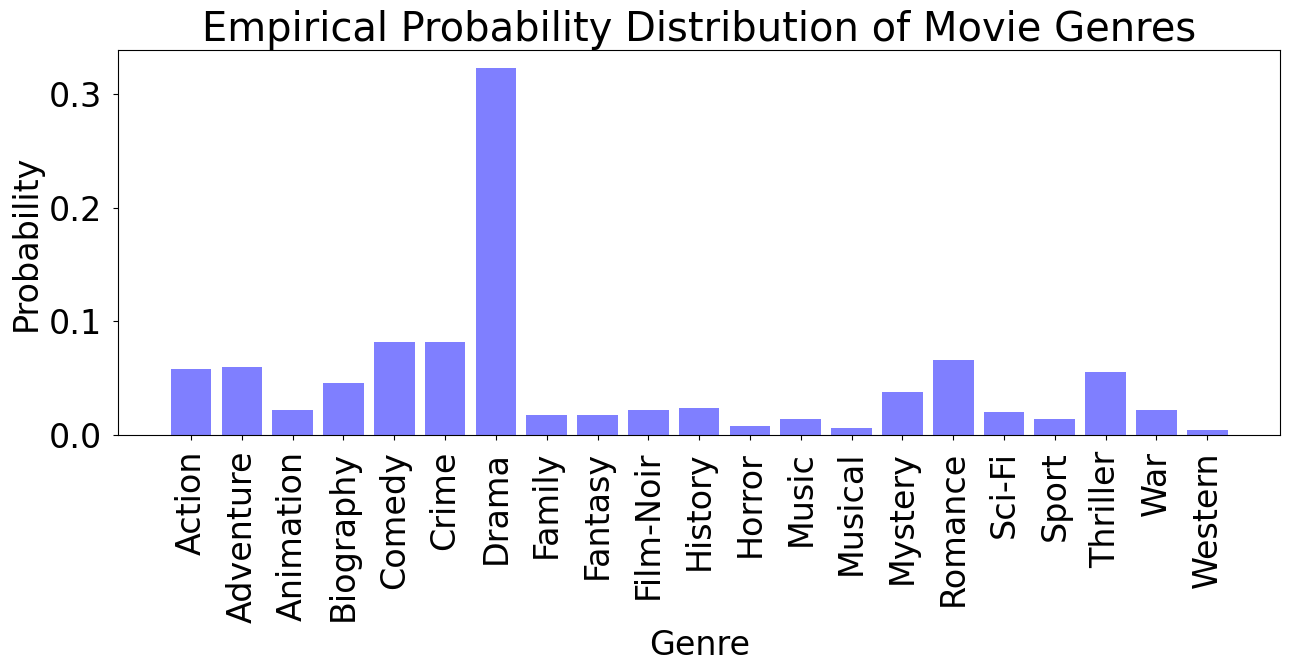

The bar chart shows the empirical probability distribution of various movie genres, suggesting the relative frequency of each genre within a given set of top movies. Drama stands out as the most common genre, with a significantly higher probability compared to others. This suggests that drama is a common element among top movies, possibly indicating a preference for dramatic storytelling or that it is often combined with other genres.

In [ ]:
create_scatter_plot(clean_grosses, clean_votes, 'Gross Earnings vs. Number of Votes', 'Gross Earnings ($)', 'Number of Votes', 'gross_vs_votes_scatter.png')

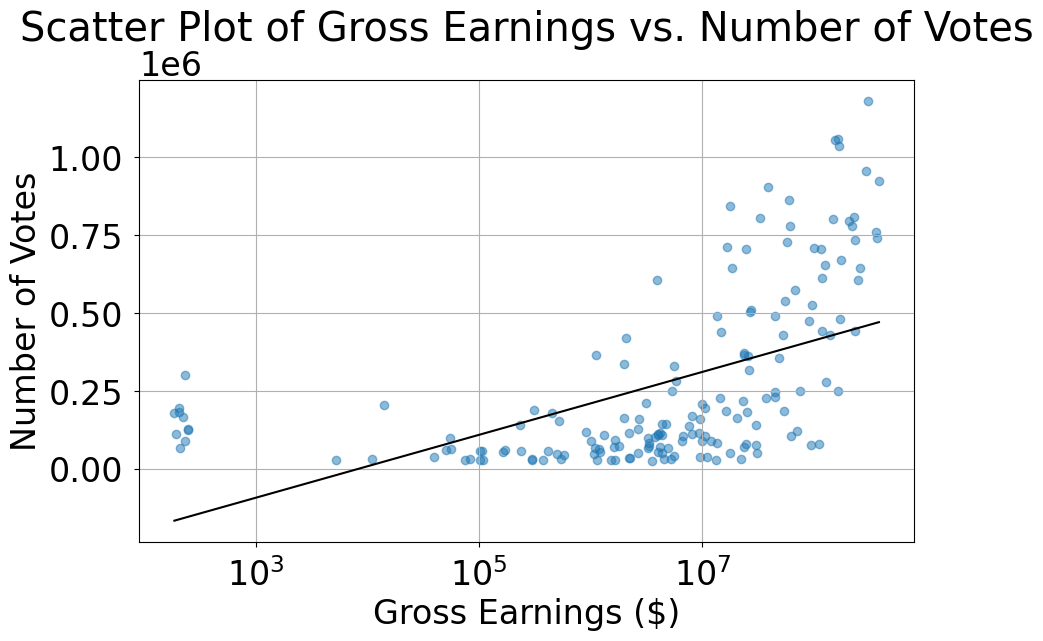

We can see a positive correlation between gross earnings and number of votes. Movies that receive a high number of votes are likely to have engaged a significant audience. This engagement can be a strong indicator of a movie's popularity, which often translates to higher box office earnings.

<center><h2>Conclusion</h2> </center>

<p>
The analysis of movie ratings, votes, gross earnings, and genres reveals several intriguing trends. Firstly, there's a positive correlation between movie ratings and the number of votes: movies that are highly rated tend to receive more votes, likely because they evoke strong reactions from viewers. Neutral movies, on the other hand, often don't inspire viewers to vote. In contrast, there's an inverse relationship between ratings and earnings; as earnings increase, ratings tend to decrease, possibly due to genre differences like high-budget sci-fi movies not always receiving high ratings compared to less expensive dramas. Drama stands out as the most prevalent among top-rated movies, suggesting a general preference for or frequent combination of dramatic elements in successful films. Lastly, a positive correlation exists between the number of votes a movie receives and its gross earnings, indicating that movies engaging large audiences also tend to perform well financially. This comprehensive analysis underscores the multifaceted nature of movie success, intertwining critical reception, audience engagement, financial outcomes, and genre trends.</p>